In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import os
import json
from IPython.display import Image 
from IPython.display import clear_output

In [3]:
# import data
print('Loading data ...')
data_file = 'covid_users_100000_non-org_val.jsonl'
data = open(data_file, 'r').readlines()
users = [json.loads(u) for u in data]
labeled = 0
for u in users:
    if u['is_student'] in [0,1]:
        labeled += 1

# unlabeled_users = sorted(unlabeled_users)
print('Extracted {} unlabeled users.'.format(len(users)-labeled))

Loading data ...
Extracted 1200 unlabeled users.


In [4]:
def contains_words(sent, words):
    for w in words:
        if w in sent:
            return True
    return False

In [5]:
# parameters
# counter = 0
valid = [0,1]
label = None
BOLD = '\033[1m'
END = '\033[0m'
keywords = ['school','college','university','class','student',
            'exam','phd','graduat','campus','test','final','midterm',
            'major','semester','term','varsity', ' my ']

Completed: 0
Name: Gran Turismo🖤⚡️
Location: Louisiana, USA
Number of colleges followed: 1
Followers: 169
Friends: 489
Number of all statuses: 13736
Biography: Flyhighma🕊


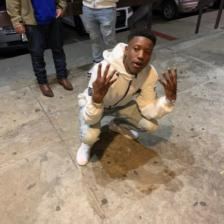


Tweets:


In [ ]:
# remember to save work right after stoping
for i in range(len(users)):
    if users[i]['is_student'] not in [0,1]:
        clear_output(wait=True)
        print(BOLD+"Completed: "+str(labeled)+END)
        print('Name:', users[i]['name'])
        print('Location:', users[i]['location'])
        print('Number of colleges followed:', len(users[i]['colleges_followed']))
        print('Followers:', users[i]['followers_count'])
        print('Friends:', users[i]['friends_count'])
        print('Number of all statuses:', users[i]['statuses_count'])
        print('Biography:', users[i]['description'])

        profile_image = Image(filename='./data/pic-resized/{}.jpeg'.format(users[i]['id']))
        display(profile_image)

        print('\nTweets:')
        tweets = users[i]['tweets']
        for tweet in tweets:
            if tweet:
                if contains_words(tweet, keywords):
                    print(BOLD+tweet+END)
                else:
                    print(tweet)

        try:
            label = int(input())
        except:
            label = 9999

        if label not in valid:
            print('Invalid label')
            label = int(input())
        else:
            users[i]['is_student'] = label
            # save work using this cell
            with open(data_file, 'w') as f:
                for u in users:
                    f.write(json.dumps(u)+'\n')
        
        labeled += 1